In [1]:
from google.colab import drive  
drive._mount('/content/drive')  

Mounted at /content/drive


In [2]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import pickle
import joblib

In [3]:
x = pd.read_csv("/content/drive/MyDrive/Covid Prediction AI Project/X.csv")
y = pd.read_csv("/content/drive/MyDrive/Covid Prediction AI Project/Y.csv")

In [4]:
x

,Unnamed: 0,cough,fever,sore_throat,shortness_of_breath,head_ache,Female,Male,Age above 60,Abroad,Contact with confirmed
0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0
2,2,0,1,0,0,0,0,1,0,0,0
3,3,1,0,0,0,0,1,0,0,0,0
4,4,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
520011,520011,1,0,0,0,0,0,1,0,0,1
520012,520012,1,0,0,0,1,1,0,0,0,0
520013,520013,0,0,0,0,0,0,1,0,0,0
520014,520014,0,1,0,0,0,0,1,0,0,0


In [5]:
y

,Unnamed: 0,Result
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
520011,520011,1
520012,520012,1
520013,520013,1
520014,520014,1


In [6]:
x.drop(columns=['Unnamed: 0'], inplace=True)
y.drop(columns=['Unnamed: 0'], inplace=True)

## Splitting the Dataset into Training, Validation and Testing Data.

In [7]:
covid_df = pd.concat([x,y],axis=1)
covid_df

,cough,fever,sore_throat,shortness_of_breath,head_ache,Female,Male,Age above 60,Abroad,Contact with confirmed,Result
0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
520011,1,0,0,0,0,0,1,0,0,1,1
520012,1,0,0,0,1,1,0,0,0,0,1
520013,0,0,0,0,0,0,1,0,0,0,1
520014,0,1,0,0,0,0,1,0,0,0,1


In [8]:
train_df,valid_df = train_test_split(covid_df,test_size=0.20,random_state=1)
train_df,test_df = train_test_split(train_df,test_size=0.10,random_state=1)

In [9]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(374410, 11)
(104004, 11)
(41602, 11)


In [10]:
train_df = train_df.reset_index()
valid_df = valid_df.reset_index()
test_df = test_df.reset_index()

In [11]:
train_df.drop(columns=['index'],inplace=True)
valid_df.drop(columns=['index'],inplace=True)
test_df.drop(columns=['index'],inplace=True)

In [12]:
independent_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
                    'Female', 'Male', 'Age above 60', 'Abroad', 'Contact with confirmed']

target_col = ['Result']

In [13]:
x_train = train_df[independent_cols].copy()
y_train = train_df[target_col].copy()

x_valid = valid_df[independent_cols].copy()
y_valid = valid_df[target_col].copy()

x_test = test_df[independent_cols].copy()
y_test = test_df[target_col].copy()

In [14]:
y_train.value_counts()

Result
0         187335
1         187075
dtype: int64

In [16]:
y_valid.value_counts()

Result
0         52063
1         51941
dtype: int64

In [15]:
y_test.value_counts(
    
)

Result
1         20992
0         20610
dtype: int64

In [18]:
x_test

,cough,fever,sore_throat,shortness_of_breath,head_ache,Female,Male,Age above 60,Abroad,Contact with confirmed
0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41597,0,0,0,0,0,1,0,1,0,0
41598,0,0,0,0,0,1,0,0,0,0
41599,0,0,0,0,0,1,0,0,0,0
41600,0,0,0,0,0,1,0,0,0,0


In [19]:
y_test

,Result
0,1
1,1
2,1
3,0
4,1
...,...
41597,0
41598,0
41599,0
41600,0


## Model Retraining - Random Forest Classifier

In [ ]:
# Model Retraining - RandomForest Classifier
rf = RandomForestClassifier(criterion='gini',
 max_depth= 1030,
 max_features = None,
 min_samples_leaf = 0.0007591618968705617,
 min_samples_split = 0.21837298391834725,
 n_estimators = 300)

rf.fit(x_train,y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(max_depth=1030, max_features=None,
                       min_samples_leaf=0.0007591618968705617,
                       min_samples_split=0.21837298391834725, n_estimators=300)

In [ ]:
# Evaluating using validation dataset
y_pred_rf = rf.predict(x_valid)

The accuracy score is :  0.8364870581900696
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[43223  8840]
 [ 8166 43775]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     52063
           1       0.83      0.84      0.84     51941

    accuracy                           0.84    104004
   macro avg       0.84      0.84      0.84    104004
weighted avg       0.84      0.84      0.84    104004



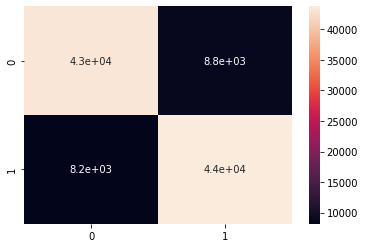

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_rf)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_rf)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_rf)
print("The Classification Report\n",clf_rep)

The accuracy score is :  0.8390221623960387
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[17094  3516]
 [ 3181 17811]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     20610
           1       0.84      0.85      0.84     20992

    accuracy                           0.84     41602
   macro avg       0.84      0.84      0.84     41602
weighted avg       0.84      0.84      0.84     41602



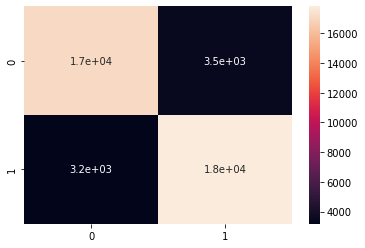

In [ ]:
# Evaluating using test dataset
y_pred_test_rf = rf.predict(x_test)

# Evaluating the model using the classification metrics for test dataset
# 1. Accuracy Score
accu_score = accuracy_score(y_test,y_pred_test_rf)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_test,y_pred_test_rf)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_test,y_pred_test_rf)
print("The Classification Report\n",clf_rep)


## Saving the Random Forest Machine Learning Model

In [ ]:
# saving our model 
# modelname - model , filename-model_jlib
joblib.dump(rf , '/content/drive/MyDrive/Covid Prediction AI Project/Models/rf_jlib')

['/content/drive/MyDrive/Covid Prediction AI Project/Models/rf_jlib']

In [ ]:
# saving our model using pickle
# modelname - rf , filename-model_pkl
pickle.dump(rf, open('/content/drive/MyDrive/Covid Prediction AI Project/Models/model.pkl', 'wb'))